# Opentrons Mass Balance Automation 

## Aniket Chitre, Daniil Bash - AMDM Group

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Set Serial Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Real-time Data

In [3]:
def get_mass(port):
    balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
    balance.write('S\r\n'.encode('utf-8'))
    time.sleep(1)
    result  = balance.read_until('\r\n'.encode('utf-8'))
    value = str(result[7:14].decode("utf-8"))
    if (value.strip() != '-------') and (value.strip() != ''):
        return (True,float(value))
    return (False,-1)

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

-0.002
-0.003
-0.002
-0.003
-0.002
-0.003
-0.003
0.002
0.002
-0.002
-0.002
0.0
0.002
-0.001
-0.002
-0.002
-0.002
0.0
0.0
0.0
-0.002
-0.002
-0.002
-0.003
-0.002
0.005
0.003
0.001
0.0
0.0
0.989
0.989
0.987
1.964
1.964
1.963
1.963
2.967
2.963
3.965
3.965
3.963
3.964
4.965
4.964
4.964
4.962
5.963
5.963
5.963
5.963
6.964
6.964
7.562
7.561
7.561
7.561
8.164
8.164
8.166
9.143
9.143
9.142
9.141
10.143
10.143
10.14
11.145
11.145
11.148
11.146
12.145
12.145
12.141
12.143
13.144
13.144
13.144
13.143
13.143
14.145
14.145
14.146
15.145
15.145
15.144
15.66
15.66
15.659
16.179
16.18
16.179
16.181
17.178
17.178
17.178
17.178
18.176
18.176
18.174
18.176
19.172
19.174
19.174
19.173
20.171
20.171
20.171
20.171
21.163
21.163
21.161
21.162
21.162
22.162
22.162
22.161
23.161
23.161
23.16
23.679
23.679
23.678
24.197
24.197
24.201
24.2
25.203
25.2
25.2
25.199
26.198
26.198
26.196
26.197
27.2
27.2
27.198
27.199
28.202
28.202
28.201
28.202
29.202
29.201
29.2
29.2
30.202
30.202
30.201
30.2
31.201
31.199
31.199
3

60.339
60.337
60.337
60.337
60.337
60.337
60.336
60.336
60.336
60.335
60.335
60.335
60.335
60.334
60.334
60.334
60.335
60.334
60.334
60.334
60.334
60.333
60.333
60.331
60.332
60.331
60.331
60.331
60.331
60.331
60.331
60.331
60.331
60.329
60.328
60.328
60.328
60.328
60.327
60.327
60.326
60.326
60.326
60.326
60.326
60.325
60.325
60.325
60.325
60.324
60.324
60.324
60.323
60.323
60.323
60.321
60.321
60.32
60.32
60.32
60.321
60.321
60.321
60.32
60.32
60.32
60.32
60.32
60.32
60.319
60.318
60.318
60.318
60.317
60.317
60.317
60.317
60.316
60.316
60.315
60.314
60.314
60.314
60.314
60.313
60.313
60.313
60.312
60.311
60.311
60.311
60.311
60.31
60.308
60.308
60.31
60.31
60.309
60.309
60.309
60.309
60.309
60.308
60.308
60.308
60.307
60.307
60.307
60.306
60.305
60.305
60.305
60.304
60.304
60.305
60.304
60.306
60.306
60.304
60.308
60.307
60.307
60.305
60.304
60.304
60.304
60.304
60.3
60.3
60.3
60.3
60.298
60.298
60.298
60.298
60.297
60.302
60.301
60.301
60.301
60.301
60.3
60.3
60.295
60.294
60.297
60

KeyboardInterrupt: 

In [5]:
results = {'Time': x[:-1], 'Mass': mass}

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,-0.002
1,2,-0.003
2,4,-0.002
3,6,-0.003
4,8,-0.002
...,...,...
1717,3434,60.170
1718,3436,60.174
1719,3438,60.175
1720,3440,60.173


<IPython.core.display.Javascript object>


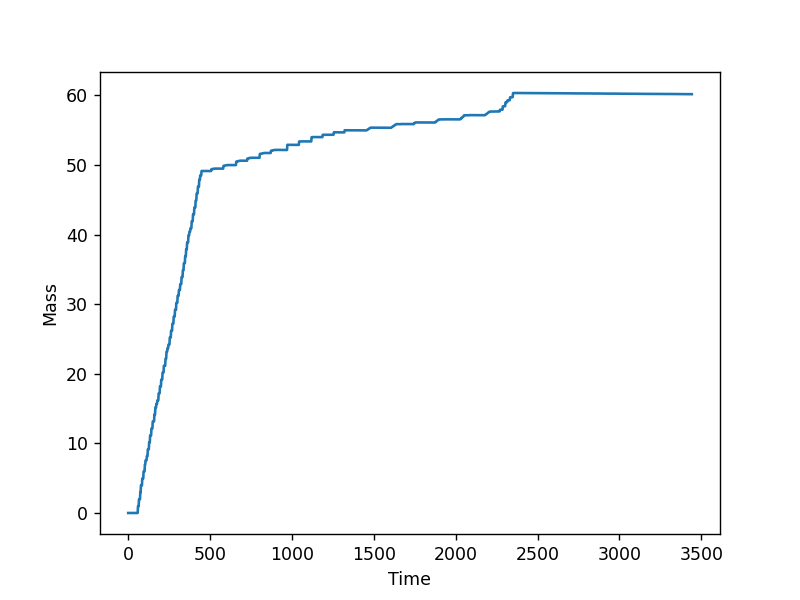

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_121222_S13-18_run1.csv')